# Variance of Stepwise Sample Means

## Import Packages

In [149]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['pdf.fonttype'] = 42


## Define Functions

In [150]:
def reciprocal_square_sum(n, i=1):
    s = np.arange(i, n+1)
    return (1 / s**2).sum()

def reciprocal_sum(n, i=1):
    s = np.arange(i, n+1)
    return (1 / s).sum()

def var_stepwise(n):
    """Calculate variance matrix of stepwise sample means
    """
    V = np.zeros((n,n))
    for i in range(0, n):
        for j in range(0, n):
            V[i,j] = n*reciprocal_square_sum(n, i=np.max([i,j])+1)\
                     - reciprocal_sum(n, i=i+1) * reciprocal_sum(n, i=j+1)
    return V

def var_ord(n):
    """Calculate ordinary variance matrix of samples
    """
    V = -np.ones((n,n))
    for i in range(n):
        V[i,i] = n - 1
    return V

def cal_mean(s):
    num = len(s)
    mean = np.zeros_like(s)
    accum = 0
    for i in range(num):
        accum += s[i]
        mean[i] = accum / (i + 1)
    return mean

def var_next(n, x_n, mean_old, var_old):
    var_new = var_old * (n-1) / n + (x_n - mean_old)**2 * (n-1) / n**2
    return var_new

def cal_var(s):
    num = len(s)
    var_tmp = 0
    mean_tmp = 0
    var = np.zeros(num)
    for i in range(num):
        var_tmp = var_next(i + 1, s[i], mean_tmp, var_tmp)
        mean_tmp += (s[i] - mean_tmp) / (i + 1)
        var[i] = np.sqrt(var_tmp / (i + 1))
    return var

def plot_data_2D(data_matrix, cmap='jet'):
    m, n = data_matrix.shape
    x_range = [1,m]
    y_range = [1,n]
    x, y = np.mgrid[x_range[0]:x_range[1]:complex(0, m), y_range[0]:y_range[1]:complex(0, n)]
    fig, ax = plt.subplots()
    p = ax.pcolormesh(x, y, data_matrix, shading='auto', cmap=cmap)
    fig.colorbar(p)
    ax.invert_yaxis()
    ax.xaxis.tick_top()


## Plot Figures

meta NOT subset; don't know how to subset; dropped


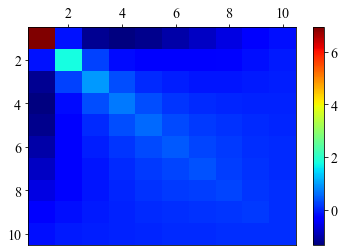

In [153]:
num = 10
V = var_stepwise(num)
plot_data_2D(V, cmap='jet')
# plt.savefig(f'figures/var_matrix_means_{num}.pdf', bbox_inches='tight', pad_inches=0.01)
plt.show()


meta NOT subset; don't know how to subset; dropped


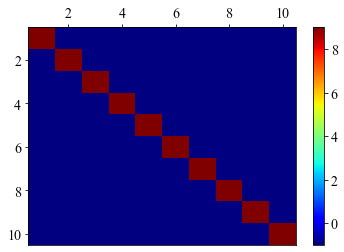

In [155]:
num = 10
V = var_ord(num)
plot_data_2D(V, cmap='jet')
# plt.savefig(f'figures/var_matrix_{num}.pdf', bbox_inches='tight', pad_inches=0.01)
plt.show()


meta NOT subset; don't know how to subset; dropped


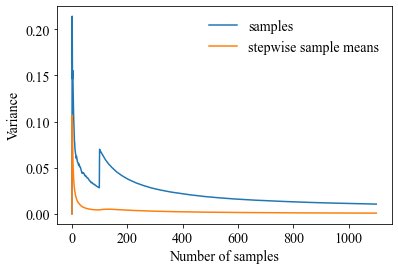

In [161]:
num = 1000
a = np.random.rand(num)
b = np.append(np.random.rand(100), 7)
a = np.append(b,a)
a_mean = cal_mean(a)
a_var = cal_var(a)
a_var_stepwise = cal_var(a_mean)

plt.plot(a_var, label='samples')
plt.plot(a_var_stepwise, label='stepwise sample means')
plt.xlabel('Number of samples')
plt.ylabel('Variance')
plt.legend(frameon=False)
# plt.savefig('figures/samples_vs_means_normal.pdf', bbox_inches='tight', pad_inches=0.01)
# plt.savefig('figures/samples_vs_means_outlier.pdf', bbox_inches='tight', pad_inches=0.01)
plt.show()


meta NOT subset; don't know how to subset; dropped


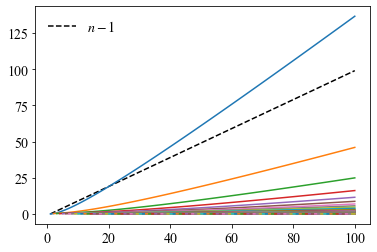

In [158]:
# diag of variance matrix of stepwise sample means
plt.figure()
num = 100
plt.plot(np.arange(1, num+1),np.array([n-1 for n in np.arange(num)+1]), color='k', linestyle='dashed', label='$n-1$')
for row in range(1,num):
    plt.plot(np.arange(row, num+1),np.array([n*reciprocal_square_sum(n,i=row) - reciprocal_sum(n,i=row)**2 for n in np.arange(row, num+1)]))
plt.legend(frameon=False)
# plt.savefig('figures/diag_var_matrix.pdf', bbox_inches='tight', pad_inches=0.01)
plt.show()


meta NOT subset; don't know how to subset; dropped


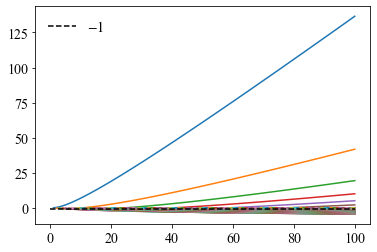

In [159]:
# first column of variance matrix of stepwise sample means
plt.figure()
num = 100
for row in range(1,num):
    plt.plot(np.arange(row,num+1), np.array([n*reciprocal_square_sum(n,i=row) - reciprocal_sum(n,i=row)*reciprocal_sum(n) for n in np.arange(row,num+1)]))
plt.plot([0,num], [-1,-1], color='k', linestyle='dashed', label='$-1$')
plt.legend(frameon=False)
# plt.savefig('figures/first_column_var_matrix.pdf', bbox_inches='tight', pad_inches=0.01)
plt.show()
